In [1]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 58.3 MB/s eta 0:00:00


In [9]:
print("derived")
import mne
derived = mne.io.read_raw_fif('/content/1raw.fif')
print(derived)


derived
Opening raw data file /content/1raw.fif...
    Range : 541 ... 115741 =      4.227 ...   904.227 secs
Ready.
<Raw | 1raw.fif, 33 x 115201 (900.0 s), ~45 KiB, data not loaded>


In [ ]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Load an example subject's epoched EEG data
epoch_file = "/content/drive/MyDrive/data/derivatives/sub-01/ses-01/sub-01_ses-01_eeg-epo-trimmed.fif"
epochs = mne.read_epochs(epoch_file, preload=True)

# Print dataset information
print(epochs.info)  # EEG channel count, sampling rate, etc.
print("Number of trials:", len(epochs))  # Total number of epochs (trials)
print("Labels present:", epochs.event_id)  # Available classes
print("Epochs shape:", epochs.get_data().shape)  # (trials, channels, timepoints)


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/YOUR_FILE_NAME.zip"  # Update with your actual ZIP file path
extract_path = "/content/drive/MyDrive/data"  # Destination folder

# Extracting
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed successfully!")


In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Load an example subject's epoched EEG data
epoch_file = "/content/sub-01_ses-01_eeg-epo.fif"
epochs = mne.read_epochs(epoch_file, preload=True)

# Print dataset information
print(epochs.info)  # EEG channel count, sampling rate, etc.
print("Number of trials:", len(epochs))  # Total number of epochs (trials)
print("Labels present:", epochs.event_id)  # Available classes
print("Epochs shape:", epochs.get_data().shape)  # (trials, channels, timepoints)


Reading /content/sub-01_ses-01_eeg-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    6000.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
<Info | 11 non-empty values
 bads: []
 ch_names: Cz, Fz, Fp1, F7, F3, FC1, C3, FC5, FT9, T7, CP5, CP1, P3, P7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 file_id: 4 items (dict)
 highpass: 60.0 Hz
 lowpass: 64.0 Hz
 meas_date: 2024-04-13 11:11:32 UTC
 meas_id: 4 items (dict)
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
 subject_info: <subject_info | his_id: sub-01>
>
Number of trials: 150
Labels present: {'Up': 1, 'Down': 2, 'Right': 3, 'Left': 4, 'Select': 5, 'Cancel': 6}
Epochs shape: (150, 32, 769)


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


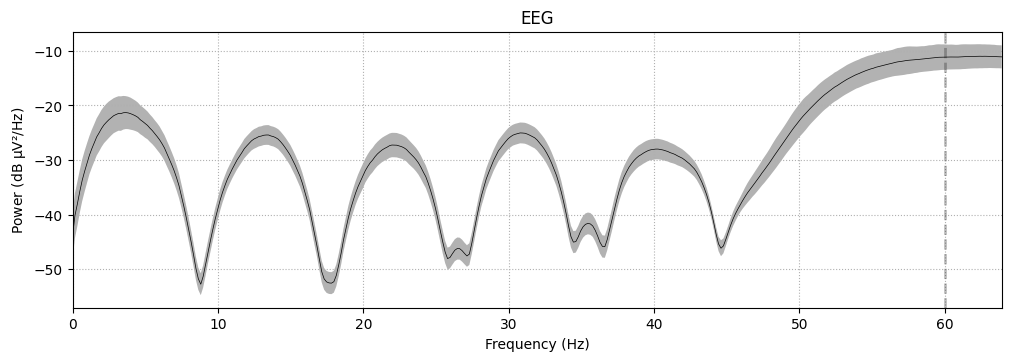

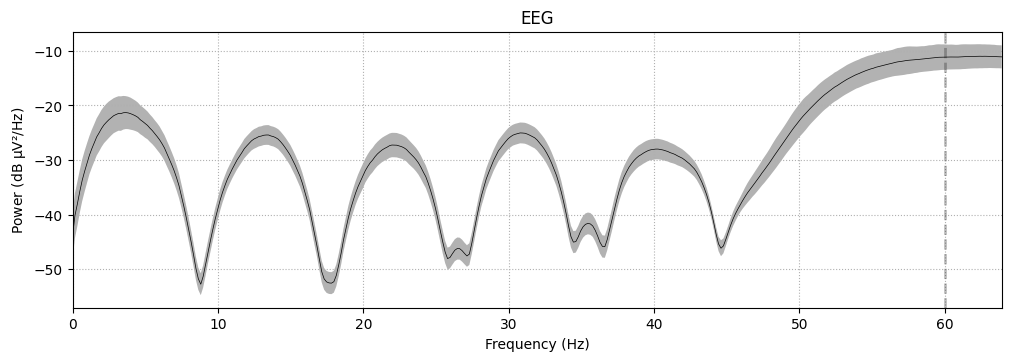

In [3]:
# Compute and plot Power Spectral Density
psd = epochs.compute_psd()
psd.plot(average=True, show=True)


combining channels using "mean"
combining channels using "mean"


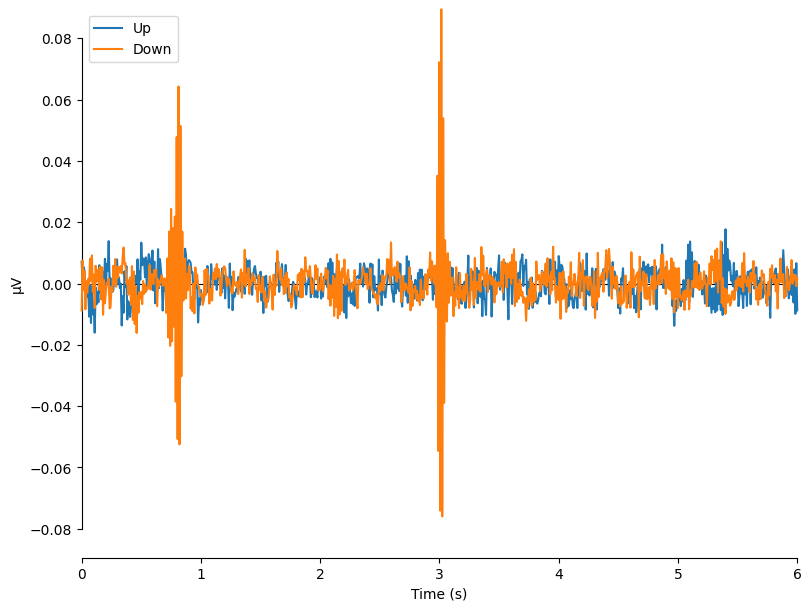

[<Figure size 800x600 with 1 Axes>]

In [4]:
# Compute average response per class
evoked_up = epochs['Up'].average()
evoked_down = epochs['Down'].average()

# Plot ERP for "Up" and "Down"
mne.viz.plot_compare_evokeds({'Up': evoked_up, 'Down': evoked_down},
                             ci=True, combine='mean', show=True)


Using matplotlib as 2D backend.


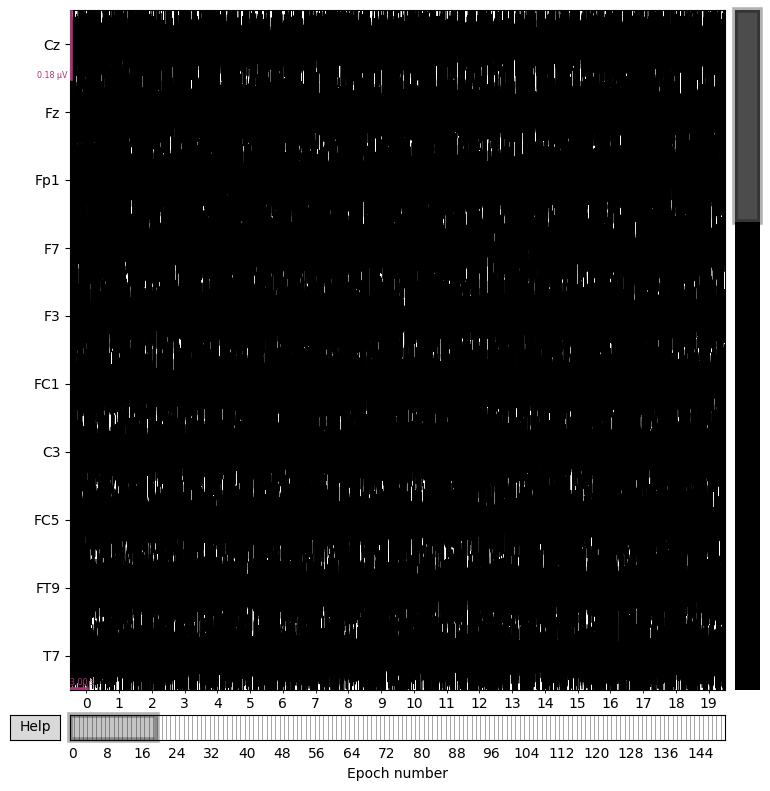

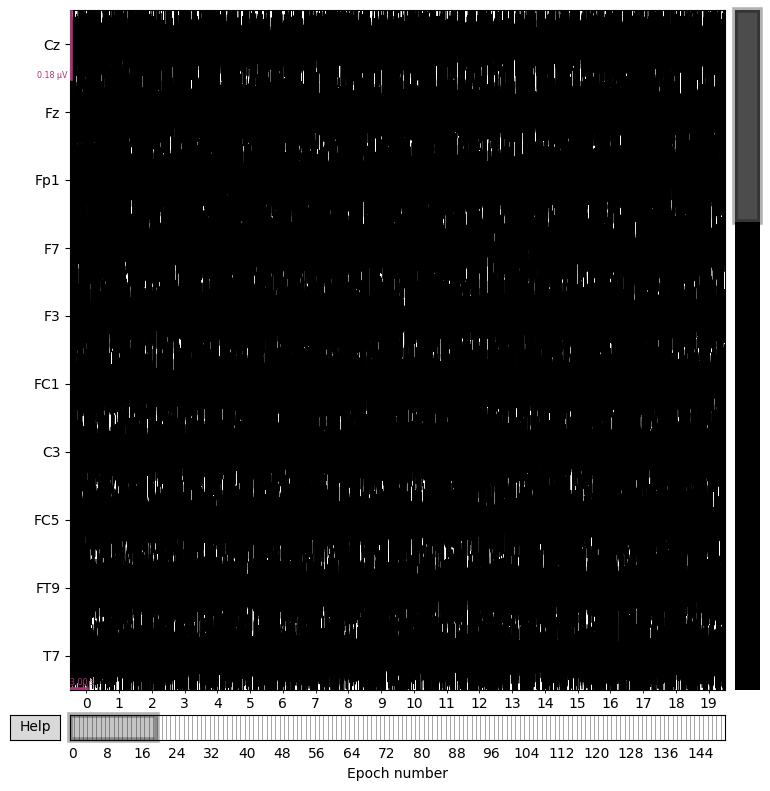

In [5]:
epochs.plot(n_channels=10, scalings="auto", title="Raw EEG Signals", block=True)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


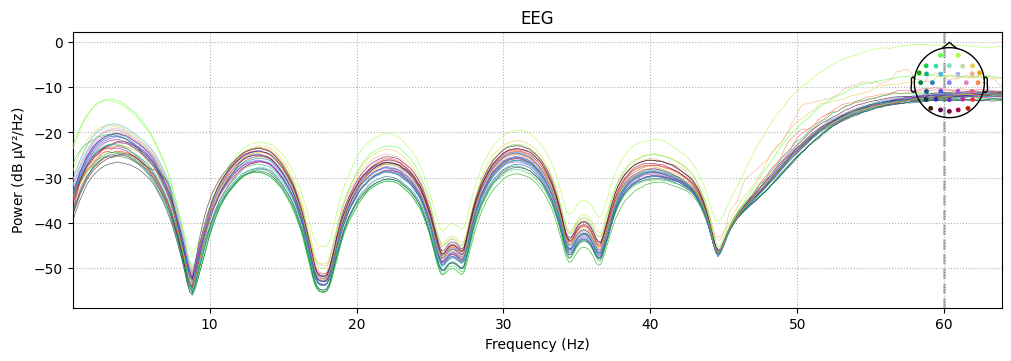

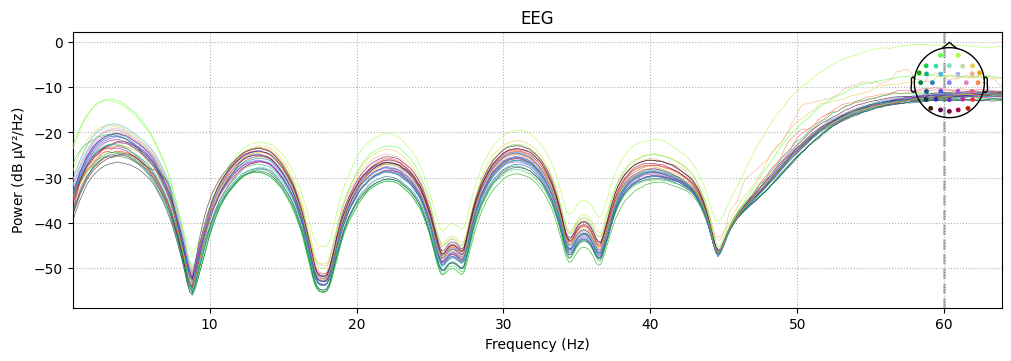

In [6]:
epochs.plot_psd(fmin=0.5, fmax=64)


Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 845 samples (6.602 s)



<ipython-input-13-2fea8410524a>:4: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  epochs._data = filter.notch_filter(epochs.get_data(), Fs=128,freqs=60)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    1.2s
[Parallel(n_jobs

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    2.0s


Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


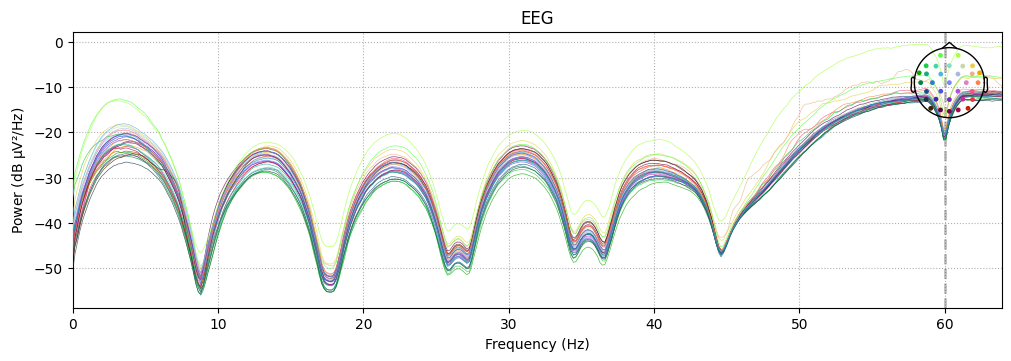

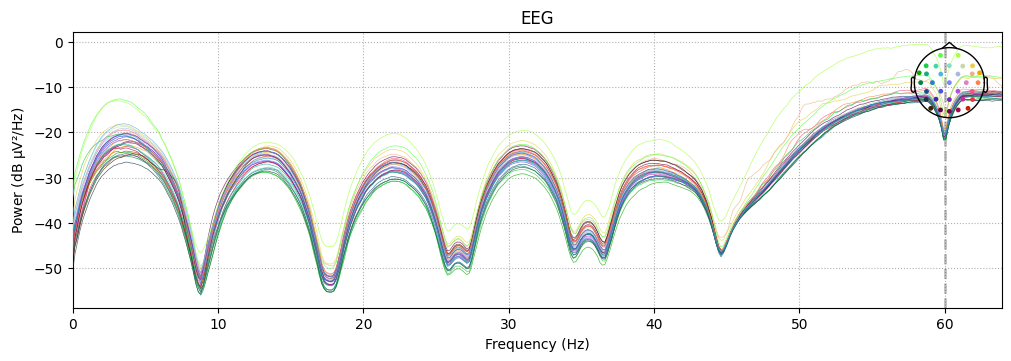

In [13]:
from mne import filter

# Apply a notch filter at 60 Hz to remove powerline noise
epochs._data = filter.notch_filter(epochs.get_data(), Fs=128,freqs=60)

# Verify by plotting PSD again
epochs.plot_psd()


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 845 samples (6.602 s)



<ipython-input-20-4e59de97ee3f>:4: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  epochs._data = filter.notch_filter(epochs.get_data(),freqs=[58.5,61.5] ,Fs=epochs.info['sfreq'],method='fir', phase='zero')
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Don

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    2.0s


Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


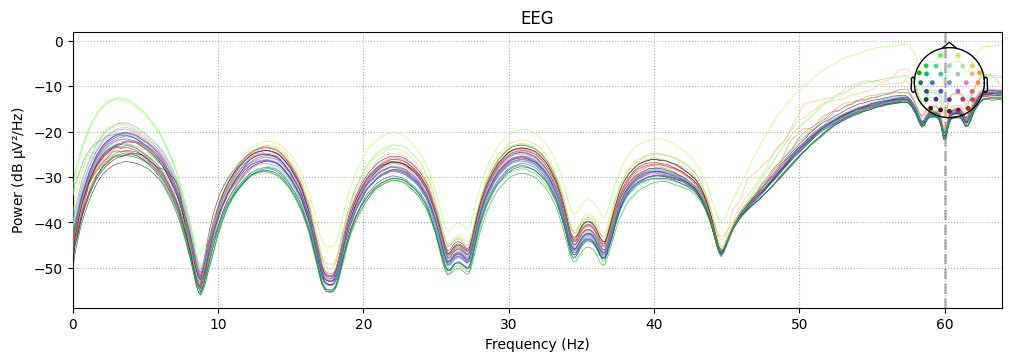

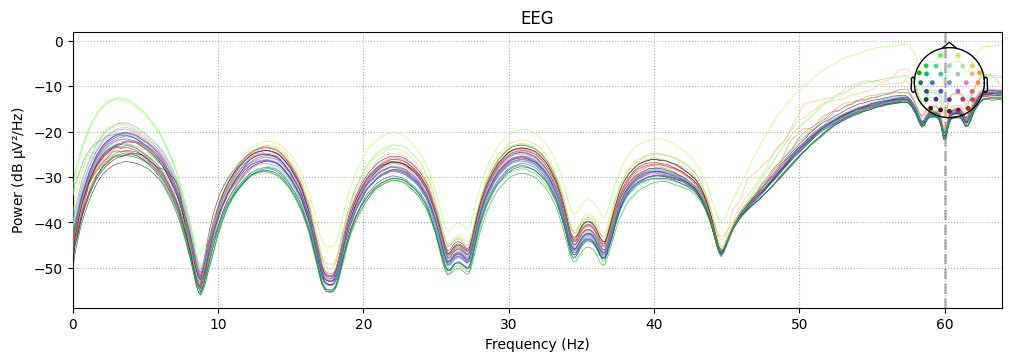

In [20]:
from mne import filter

# Apply notch filter at 60 Hz and its harmonics (120 Hz)
epochs._data = filter.notch_filter(epochs.get_data(),freqs=[58.5,61.5] ,Fs=epochs.info['sfreq'],method='fir', phase='zero')
 # Removes 60 Hz and 120 Hz noise

# Replot PSD to check if noise is reduced
epochs.plot_psd()



Setting up band-stop filter from 58 - 62 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 58.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 58.25 Hz)
- Upper passband edge: 61.50 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 61.75 Hz)
- Filter length: 845 samples (6.602 s)



<ipython-input-26-8cbb9c7f6c1d>:1: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  epochs._data = filter.notch_filter(epochs.get_data(),freqs=[60], notch_widths=2,Fs=128)  # Wider notch (±2 Hz around 60 Hz)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Don

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    4.2s


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


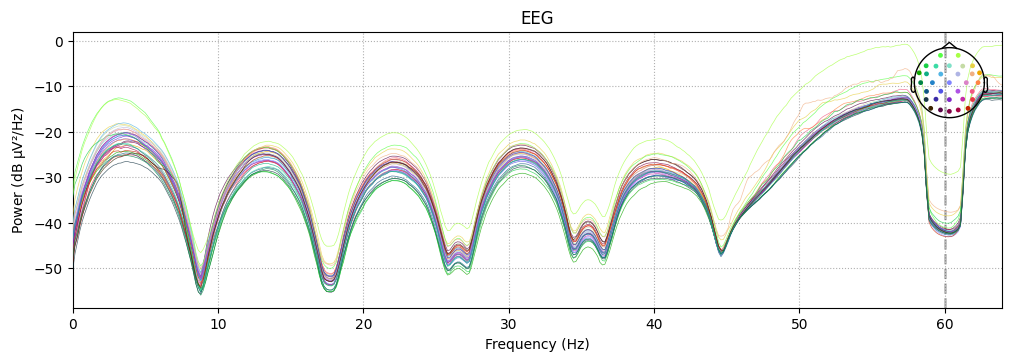

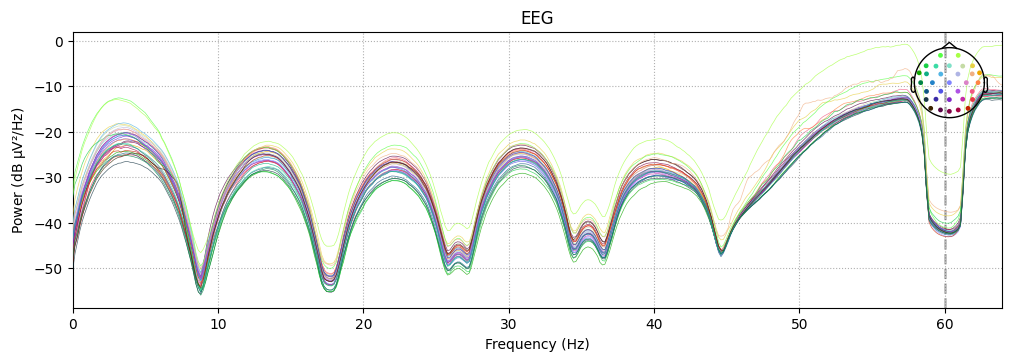

In [26]:
epochs._data = filter.notch_filter(epochs.get_data(),freqs=[60], notch_widths=2,Fs=128)  # Wider notch (±2 Hz around 60 Hz)
epochs.plot_psd()


Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 25 components
Fitting ICA took 7.4s.


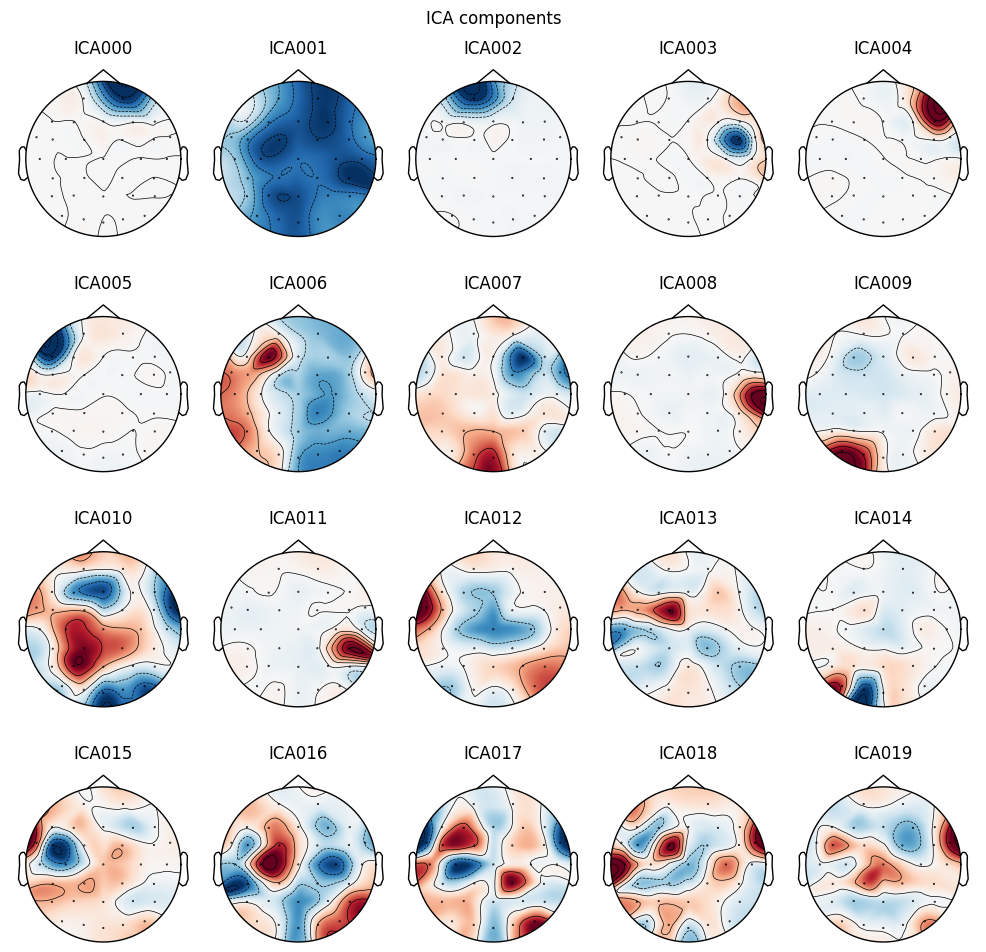

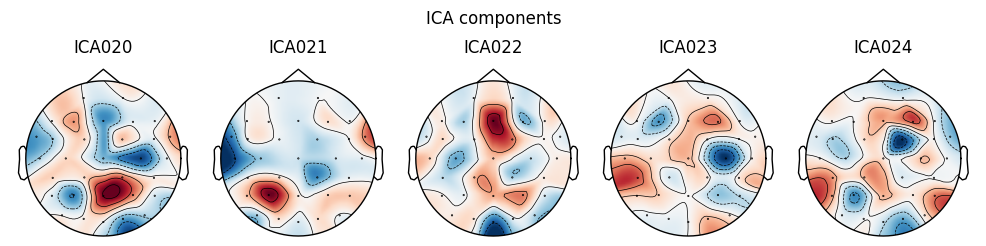

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x260.5 with 5 Axes>]

In [27]:
from mne.preprocessing import ICA

# Set up ICA parameters
n_components = 25  # Number of components to extract (less than EEG channels)
ica = ICA(n_components=n_components, random_state=97, max_iter=800)

# Fit ICA to the EEG data
ica.fit(epochs)

# Plot ICA components to visualize noise
ica.plot_components()


In [37]:
data = epochs.get_data()  # Shape: (n_epochs, n_channels, n_times)
data = data.reshape(data.shape[1], -1)  # Reshape to (n_channels, n_epochs * n_times)
info = epochs.info  # Keep metadata

# Create a RawArray
raw = mne.io.RawArray(data, info)

# Apply ICA
ica = mne.preprocessing.ICA(n_components=info["nchan"], random_state=42)
ica.fit(raw)

# Detect and remove artifacts

frontal_channels = ["Fp1", "Fp2", "Fz"]  # Modify based on EEG cap
frontal_picks = mne.pick_channels(raw.ch_names, frontal_channels, exclude=[])


if len(frontal_picks)>=1:
    eog_inds, _ = ica.find_bads_eog(raw, ch_name=[raw.ch_names[i] for i in frontal_picks])
else:
    print(" No frontal channels detected. Skipping EOG artifact detection.")
    eog_inds = []

# **Detect ECG (Heartbeat Artifacts) if available**
ecg_inds, _ = ica.find_bads_ecg(raw) if "ECG" in raw.ch_names else ([], [])

# **Detect EMG (Muscle/Motor Movements) using high-frequency power**
emg_inds = []
for i in range(len(ica.get_components())):
    component_data = ica.get_components()[i]  # Get ICA component signal
    signal_length = component_data.shape[-1]  # Get signal length

    # Ensure n_per_seg is <= signal length to avoid the error
    n_per_seg = min(128, signal_length)  # Pick a reasonable value

    # Compute power spectrum
    power, _ = mne.time_frequency.psd_array_welch(
        component_data,
        sfreq=raw.info['sfreq'],
        fmin=30, fmax=100,
        n_per_seg=n_per_seg
    )

    if power.mean() > 1e-12:  # Threshold for high-frequency noise (adjust if needed)
        emg_inds.append(i)

# **Combine all bad components**
bad_components = list(set(eog_inds + ecg_inds + emg_inds))
print(f" Detected Bad Components (EOG, ECG, EMG): {bad_components}")

# Mark components for removal
ica.exclude = bad_components

# Apply ICA and save cleaned epochs
cleaned_epochs = ica.apply(epochs)

Creating RawArray with float64 data, n_channels=32, n_times=115350
    Range : 0 ... 115349 =      0.000 ...   901.164 secs
Ready.
Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 32 components
Fitting ICA took 2.4s.
Using EOG channels: Fp1, Fp2, Fz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass fil

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window s

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


<ipython-input-41-37929aa0d018>:2: UserWarning: Zero value in spectrum for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2
  epochs.plot_psd(fmax=64)
<ipython-input-41-37929aa0d018>:2: UserWarning: Infinite value in PSD for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2.
These channels might be dead.
  epochs.plot_psd(fmax=64)


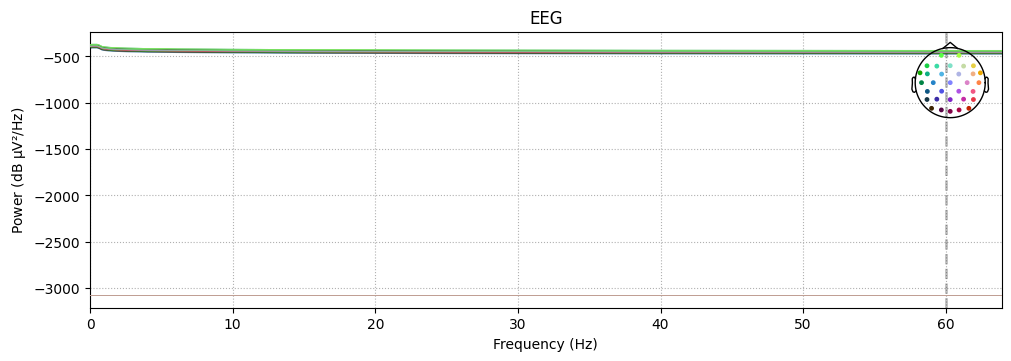

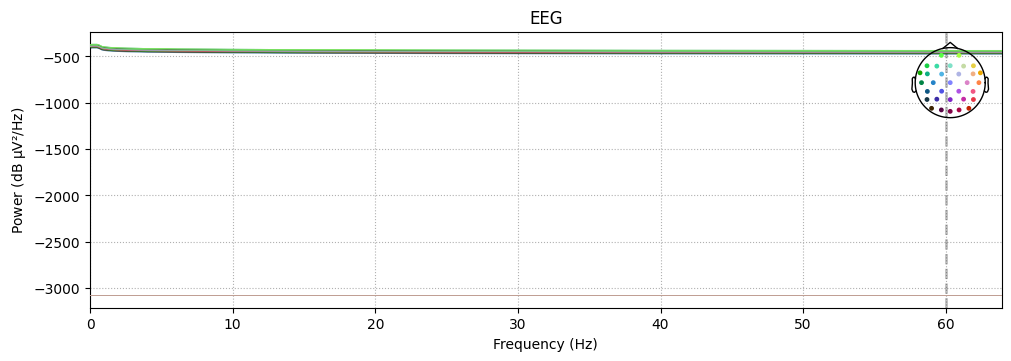

In [41]:
# Before ICA
epochs.plot_psd(fmax=64)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


<ipython-input-40-eb41dcc9553b>:2: UserWarning: Zero value in spectrum for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2
  epochs.plot_psd(fmax=64)
<ipython-input-40-eb41dcc9553b>:2: UserWarning: Infinite value in PSD for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2.
These channels might be dead.
  epochs.plot_psd(fmax=64)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


<ipython-input-40-eb41dcc9553b>:5: UserWarning: Zero value in spectrum for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2
  cleaned_epochs.plot_psd(fmax=64)
<ipython-input-40-eb41dcc9553b>:5: UserWarning: Infinite value in PSD for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2.
These channels might be dead.
  cleaned_epochs.plot_psd(fmax=64)


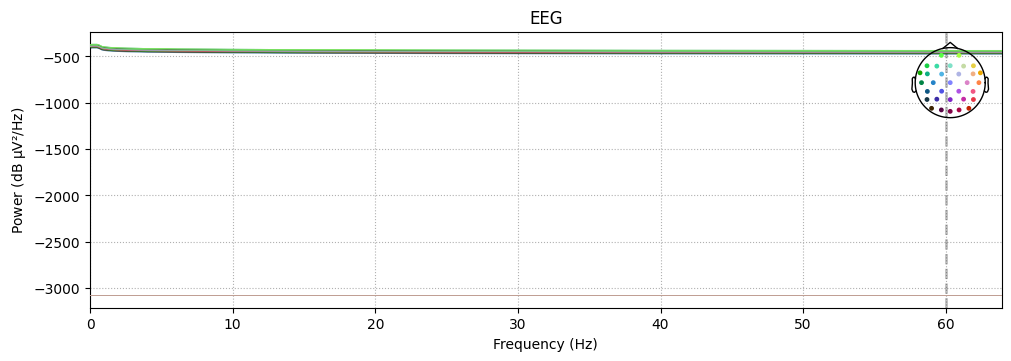

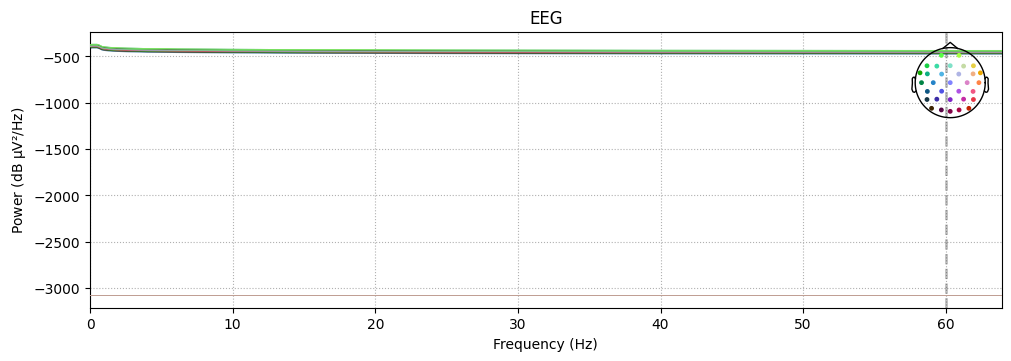

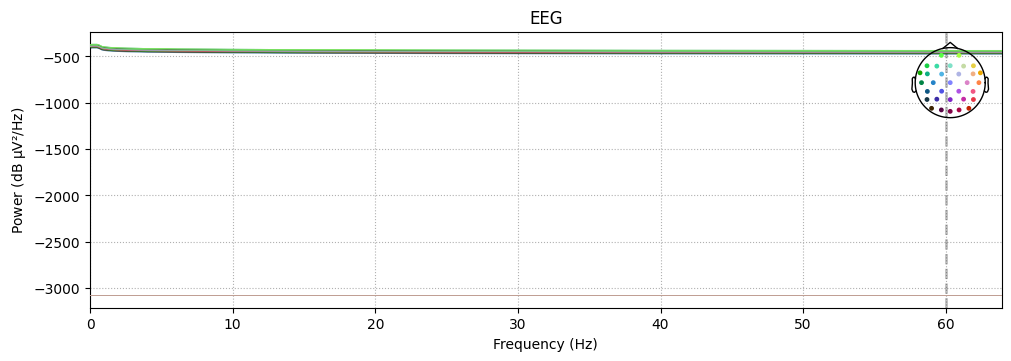

In [40]:


# After ICA
cleaned_epochs.plot_psd(fmax=64)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


<ipython-input-44-2faed260275f>:1: UserWarning: Zero value in spectrum for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2
  cleaned_epochs.plot_psd(fmax=64, dB=True, average=True)
<ipython-input-44-2faed260275f>:1: UserWarning: Infinite value in PSD for channels C3, FC5, Pz, P4, CP2, T8, FT10, FC2.
These channels might be dead.
  cleaned_epochs.plot_psd(fmax=64, dB=True, average=True)


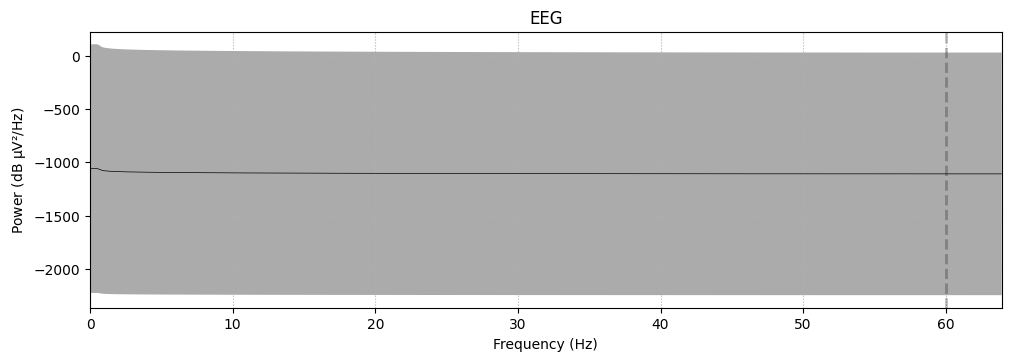

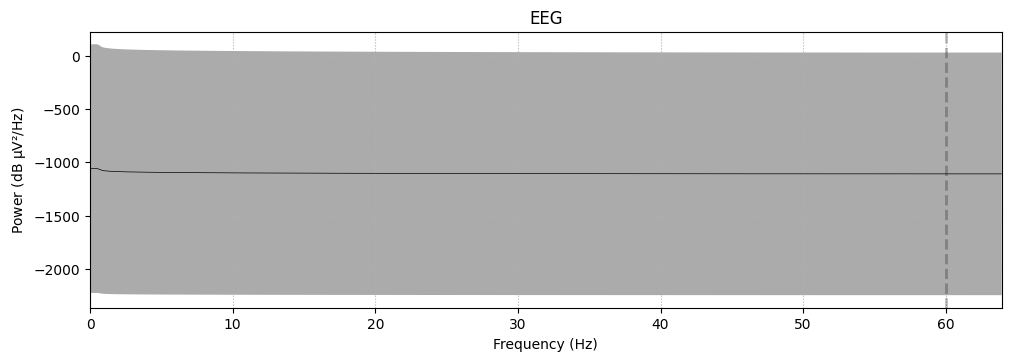

In [44]:
cleaned_epochs.plot_psd(fmax=64, dB=True, average=True)


Fitted sphere radius:         95.0 mm
Origin head coordinates:      -0.0 -0.0 40.1 mm
Origin device coordinates:    -0.0 -0.0 40.1 mm
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


<ipython-input-46-26cbbcc6f646>:3: UserWarning: Zero value in spectrum for channels Cz, Fp1, F7, F3, FT9, T7, CP5, P7, PO9, PO10, P4, T8, FC2
  epochs_csd.plot_psd(fmax=64, dB=True, average=True)
<ipython-input-46-26cbbcc6f646>:3: UserWarning: Infinite value in PSD for channels Cz, Fp1, F7, F3, FT9, T7, CP5, P7, PO9, PO10, P4, T8, FC2.
These channels might be dead.
  epochs_csd.plot_psd(fmax=64, dB=True, average=True)


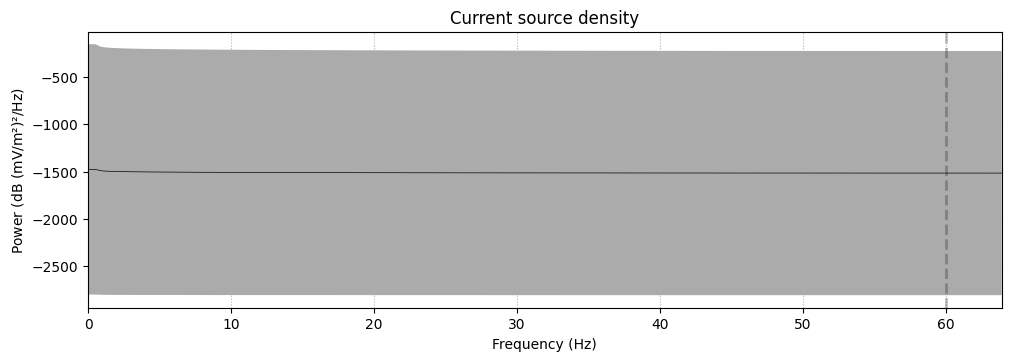

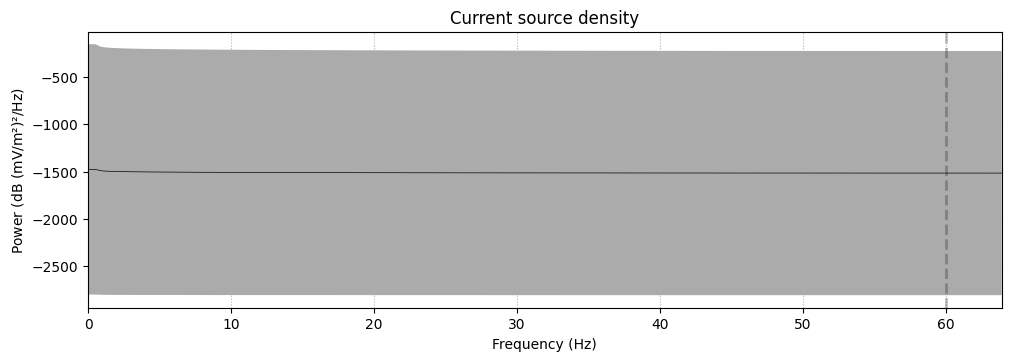

In [46]:
from mne.preprocessing import compute_current_source_density
epochs_csd = compute_current_source_density(cleaned_epochs)
epochs_csd.plot_psd(fmax=64, dB=True, average=True)


In [48]:
print(cleaned_epochs.get_data().mean(), cleaned_epochs.get_data().std())


-5.120893980303829e-12 3.9573134967959294e-11


In [49]:
cleaned_epochs.set_eeg_reference(ref_channels="average", verbose=True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<EpochsFIF | 150 events (all good), 0 – 6 s (baseline off), ~28.2 MiB, data loaded,
 'Up': 25
 'Down': 25
 'Right': 25
 'Left': 25
 'Select': 25
 'Cancel': 25>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


<ipython-input-51-2faed260275f>:1: UserWarning: Zero value in spectrum for channels Cz, Fz, Fp1, F7, C3, FT9, T7, CP5, CP1, Pz, T8, FT10, F8
  cleaned_epochs.plot_psd(fmax=64, dB=True, average=True)
<ipython-input-51-2faed260275f>:1: UserWarning: Infinite value in PSD for channels Cz, Fz, Fp1, F7, C3, FT9, T7, CP5, CP1, Pz, T8, FT10, F8.
These channels might be dead.
  cleaned_epochs.plot_psd(fmax=64, dB=True, average=True)


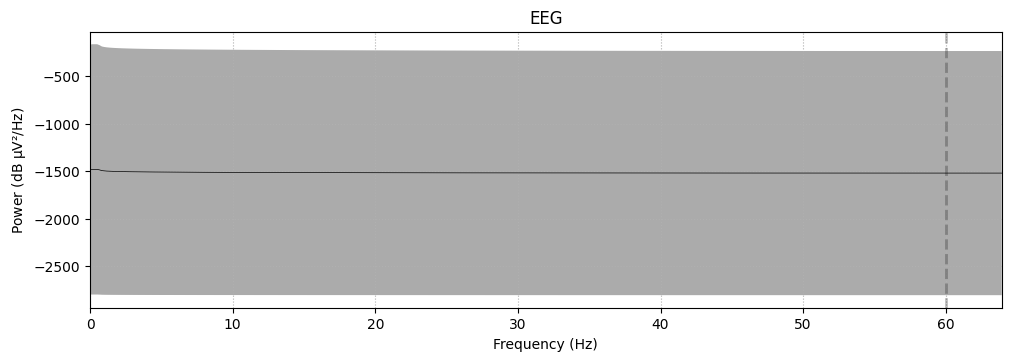

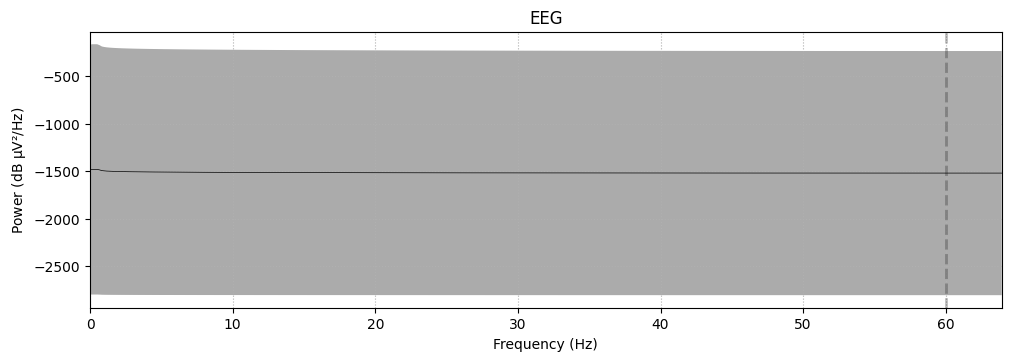

In [51]:
cleaned_epochs.plot_psd(fmax=64, dB=True, average=True)


In [52]:
cleaned_epochs.filter(l_freq=1.0, h_freq=None)


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    1.5s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    3.2s


<EpochsFIF | 150 events (all good), 0 – 6 s (baseline off), ~28.2 MiB, data loaded,
 'Up': 25
 'Down': 25
 'Right': 25
 'Left': 25
 'Select': 25
 'Cancel': 25>

In [53]:
print(cleaned_epochs.get_data().mean(), cleaned_epochs.get_data().std())


-3.1303005515766008e-30 4.638971694319931e-27


In [55]:
cleaned_epochs.set_eeg_reference(ref_channels="average", verbose=True)



EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<EpochsFIF | 150 events (all good), 0 – 6 s (baseline off), ~28.2 MiB, data loaded,
 'Up': 25
 'Down': 25
 'Right': 25
 'Left': 25
 'Select': 25
 'Cancel': 25>

In [57]:
cleaned_epochs.apply_function(lambda x: x - np.mean(x, axis=-1, keepdims=True))


<EpochsFIF | 150 events (all good), 0 – 6 s (baseline off), ~28.2 MiB, data loaded,
 'Up': 25
 'Down': 25
 'Right': 25
 'Left': 25
 'Select': 25
 'Cancel': 25>

In [58]:
import numpy as np
bad_chs = []

for i, ch in enumerate(cleaned_epochs.info["ch_names"]):
    ch_mean = np.abs(cleaned_epochs.get_data()[:, i, :].mean())
    if ch_mean > 1e3:  # Adjust threshold if needed
        bad_chs.append(ch)

print("Bad channels:", bad_chs)

# Drop them if necessary
if bad_chs:
    cleaned_epochs.drop_channels(bad_chs)


Bad channels: []


3.4284057679267417e-44 4.5513304594393836e-27
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


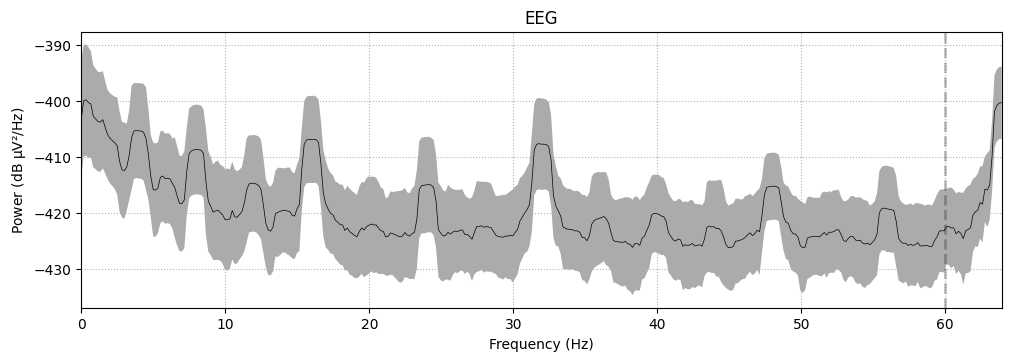

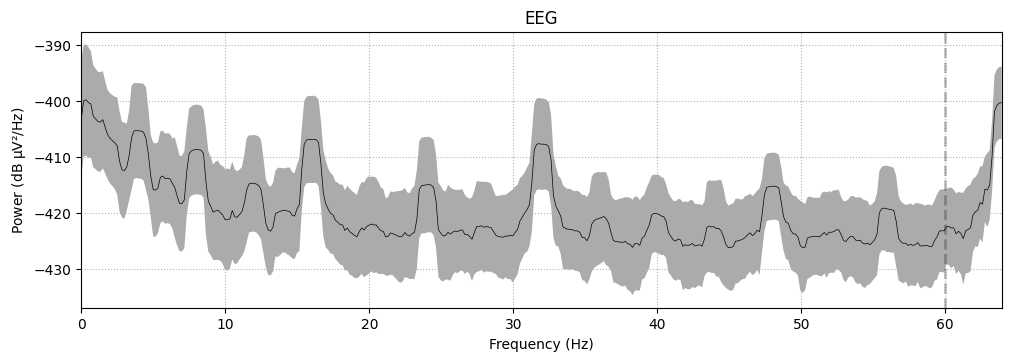

In [59]:
epochs_clean=cleaned_epochs
print(epochs_clean.get_data().mean(), epochs_clean.get_data().std())

epochs_clean.plot_psd(fmax=64, dB=True, average=True)


In [60]:
def preprocess_epochs(epochs):
    # Notch filter
    epochs._data = mne.filter.notch_filter(epochs.get_data(), freqs=[60], notch_widths=2, Fs=128)
    epochs.plot_psd()

    # Reshape data for ICA
    data = epochs.get_data()
    data = data.reshape(data.shape[1], -1)  # Reshape to (n_channels, n_epochs * n_times)
    info = epochs.info  # Keep metadata

    # Create RawArray for ICA
    raw = mne.io.RawArray(data, info)


    ica = mne.preprocessing.ICA(n_components=info["nchan"], random_state=42)
    ica.fit(raw)

    # Detect and remove artifacts
    frontal_channels = ["Fp1", "Fp2", "Fz"]
    frontal_picks = mne.pick_channels(raw.ch_names, frontal_channels, exclude=[])

    if len(frontal_picks) >= 1:
        eog_inds, _ = ica.find_bads_eog(raw, ch_name=[raw.ch_names[i] for i in frontal_picks])
    else:
        print("⚠️ No frontal channels detected. Skipping EOG artifact detection.")
        eog_inds = []

    ecg_inds, _ = ica.find_bads_ecg(raw) if "ECG" in raw.ch_names else ([], [])

    emg_inds = []
    for i in range(len(ica.get_components())):
        component_data = ica.get_components()[i]
        signal_length = component_data.shape[-1]
        n_per_seg = min(128, signal_length)
        power, _ = mne.time_frequency.psd_array_welch(
            component_data, sfreq=raw.info['sfreq'], fmin=30, fmax=100, n_per_seg=n_per_seg
        )
        if power.mean() > 1e-12:
            emg_inds.append(i)

    bad_components = list(set(eog_inds + ecg_inds + emg_inds))
    print(f"Detected Bad Components (EOG, ECG, EMG): {bad_components}")
    ica.exclude = bad_components

    # Apply ICA and finalize preprocessing
    cleaned_epochs = ica.apply(epochs)
    cleaned_epochs.filter(l_freq=1.0, h_freq=None)
    cleaned_epochs.set_eeg_reference(ref_channels="average", verbose=True)
    cleaned_epochs.apply_function(lambda x: x - np.mean(x, axis=-1, keepdims=True))

    # Detect bad channels
    bad_chs = []
    for i, ch in enumerate(cleaned_epochs.info["ch_names"]):
        ch_mean = np.abs(cleaned_epochs.get_data()[:, i, :].mean())
        if ch_mean > 1e3:
            bad_chs.append(ch)
    print("Bad channels:", bad_chs)

    if bad_chs:
        cleaned_epochs.drop_channels(bad_chs)

    return cleaned_epochs

def process_all_subjects(derivatives_dir, output_dir, num_subjects=10, num_sessions=4):
    for subject in range(1, num_subjects + 1):
        subject_id = f"sub-{subject:02d}"
        for session in range(1, num_sessions + 1):
            session_id = f"ses-0{session}"
            file_path = os.path.join(derivatives_dir, subject_id, session_id, "eeg", f"{subject_id}_{session_id}_task-innerspeech_eeg.fif")

            if os.path.exists(file_path):
                print(f"Processing {file_path}...")
                raw = mne.io.read_raw_fif(file_path, preload=True, verbose=False)
                events, event_id = mne.events_from_annotations(raw)
                epochs = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=1.0, baseline=(None, 0), preload=True)
                cleaned_epochs = preprocess_epochs(epochs)

                output_path = os.path.join(output_dir, subject_id, session_id)
                os.makedirs(output_path, exist_ok=True)
                cleaned_epochs.save(os.path.join(output_path, f"{subject_id}_{session_id}_cleaned-epo.fif"), overwrite=True)
            else:
                print(f"File not found: {file_path}")


In [ ]:
/content/extracted_data/data/derivatives/sub-06/ses-03/sub-06_ses-03_eeg-epo-trimmed.fif
/content/extracted_data/data/derivatives/sub-06/ses-03/sub-06_ses-03_eeg-epo.fif


In [93]:
def extract_subject_from_fif(root_dir, N_S, N_B):
    """
    Load the EEG data from .fif files in the derivatives folder.
    root_dir: Path of root directory containing subject folders
    N_S: Subject number
    N_B: Session number
    """
    Num_s = f"sub-{N_S:02d}"
    file_name = os.path.join(root_dir, 'data', 'derivatives', Num_s, f'ses-0{N_B}',f'{Num_s}_ses-0{N_B}_eeg-epo.fif')
    epochs = mne.read_epochs(file_name, preload=True, verbose='WARNING')
    return epochs, Num_s

def ensure_dir(dir_name):
    """Create directory if it does not exist."""
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

def process_all_subjects(zip_path, extract_to, save_dir, subjects=range(8,9), sessions=range(1,3)):
    """Extract and preprocess all subjects and sessions."""
    #extract_zip(zip_path, extract_to)
    ensure_dir(save_dir)

    for subj in subjects:
        for sess in sessions:
            print(f"Processing Subject {subj}, Session {sess}...")
            raw, subj_id = extract_subject_from_fif(extract_to, subj, sess)
            cleaned_epochs = preprocess_epochs(raw)
            save_path = os.path.join(save_dir, f"{subj_id}_ses-0{sess}_cleaned-epo.fif")
            cleaned_epochs.save(save_path, overwrite=True)
            print(f"Saved cleaned data to {save_path}")

In [63]:
import os
import zipfile
def extract_zip(zip_path, extract_to):
    """Extract ZIP file if not already extracted."""
    if not os.path.exists(extract_to):
        os.makedirs(extract_to)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)


Processing Subject 8, Session 1...
Setting up band-stop filter from 58 - 62 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 58.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 58.25 Hz)
- Upper passband edge: 61.50 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 61.75 Hz)
- Filter length: 845 samples (6.602 s)



<ipython-input-60-4a6be241dd50>:3: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  epochs._data = mne.filter.notch_filter(epochs.get_data(), freqs=[60], notch_widths=2, Fs=128)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:  

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    2.0s


    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Creating RawArray with float64 data, n_channels=32, n_times=115350
    Range : 0 ... 115349 =      0.000 ...   901.164 secs
Ready.
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-60-4a6be241dd50>:16: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 32 components
Fitting ICA took 1.2s.
Using EOG channels: Fp1, Fp2, Fz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
🎯 Detected Bad Components (EOG, ECG, EMG): [0, 1

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Bad channels: []
Saved cleaned data to ./cleaned_data/sub-08_ses-01_cleaned-epo.fif
Processing Subject 8, Session 2...
Setting up band-stop filter from 58 - 62 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 58.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 58.25 Hz)
- Upper passband edge: 61.50 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 61.75 Hz)
- Filter length: 845 samples (6.602 s)



<ipython-input-60-4a6be241dd50>:3: RuntimeWarning: filter_length (845) is longer than the signal (769), distortion is likely. Reduce filter length or filter a longer signal.
  epochs._data = mne.filter.notch_filter(epochs.get_data(), freqs=[60], notch_widths=2, Fs=128)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:  

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.0s


Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Creating RawArray with float64 data, n_channels=32, n_times=114581
    Range : 0 ... 114580 =      0.000 ...   895.156 secs
Ready.
Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-60-4a6be241dd50>:16: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 32 components
Fitting ICA took 1.1s.
Using EOG channels: Fp1, Fp2, Fz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective wind

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 3041 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 3527 tasks      | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    0.9s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done 4607 tasks      | elapsed:    1.1s


Bad channels: []
Saved cleaned data to ./cleaned_data/sub-08_ses-02_cleaned-epo.fif


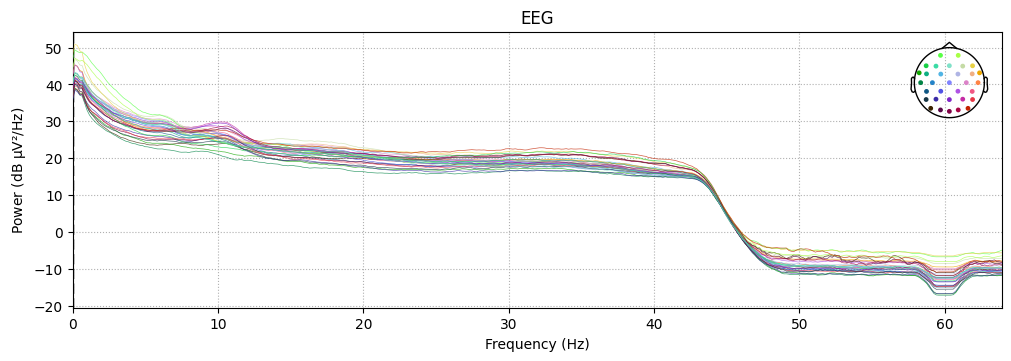

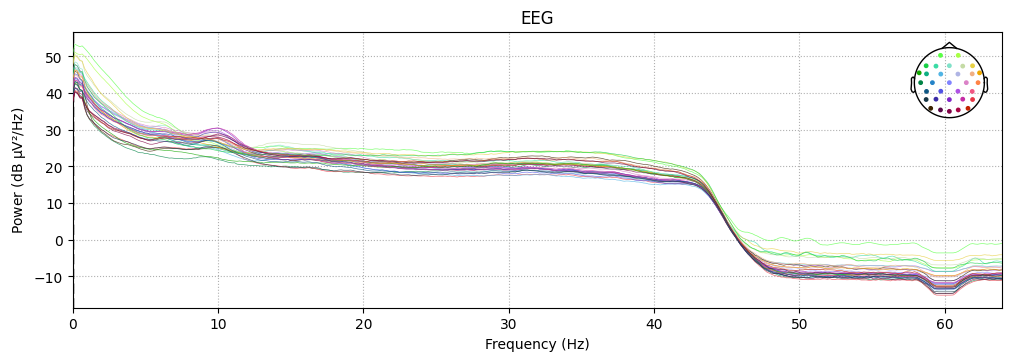

In [94]:
process_all_subjects("/content/data.zip", "./extracted_data", "./cleaned_data")
#/content/extracted_data/data/derivatives/sub-01/ses-01/sub-01_ses-01_eeg-epo-trimmed.fif

In [69]:
import os
print("Available subjects:", os.listdir("./extracted_data/data/Derivatives"))
print("Checking path:", file_name)
print("File exists:", os.path.exists(file_name))


FileNotFoundError: [Errno 2] No such file or directory: './extracted_data/data/Derivatives'

In [103]:
!pip install antropy

In [104]:
import numpy as np
import mne
from scipy.stats import skew, kurtosis
from scipy.signal import welch
import antropy as ant  # Install using: pip install antropy


In [95]:
import shutil

# Define paths
cleaned_data_path = "./cleaned_data"
zip_path = "./cleaned_data.zip"

# Zip the folder
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', cleaned_data_path)

# Download the zipped file
from google.colab import files
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
def extract_time_features(epoch_data):
    """
    Extracts time-domain features from an EEG epoch.
    Input: epoch_data (shape: [n_channels, n_times])
    Output: Dictionary of time-domain features
    """
    features = {}

    for ch in range(epoch_data.shape[0]):  # Loop through channels
        signal = epoch_data[ch]

        features[f'ch{ch}_mean'] = np.mean(signal)
        features[f'ch{ch}_std'] = np.std(signal)
        features[f'ch{ch}_var'] = np.var(signal)
        features[f'ch{ch}_skew'] = skew(signal)
        features[f'ch{ch}_kurtosis'] = kurtosis(signal)
        features[f'ch{ch}_peak2peak'] = np.ptp(signal)  # Peak-to-Peak amplitude

    return features


In [97]:
def extract_frequency_features(epoch_data, sfreq):
    """
    Extracts power spectral density features from EEG epoch using Welch’s method.
    Input: epoch_data (shape: [n_channels, n_times]), sfreq (sampling frequency)
    Output: Dictionary of frequency-domain features
    """
    features = {}
    freq_bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 12),
                  'beta': (12, 30), 'gamma': (30, 100)}

    for ch in range(epoch_data.shape[0]):  # Loop through channels
        f, Pxx = welch(epoch_data[ch], fs=sfreq, nperseg=256)  # Compute PSD

        for band, (low, high) in freq_bands.items():
            band_power = np.sum(Pxx[(f >= low) & (f <= high)])
            features[f'ch{ch}_{band}_power'] = band_power

    return features


In [98]:
def extract_entropy_features(epoch_data):
    """
    Extracts entropy-based features from EEG epoch.
    Input: epoch_data (shape: [n_channels, n_times])
    Output: Dictionary of entropy features
    """
    features = {}

    for ch in range(epoch_data.shape[0]):  # Loop through channels
        features[f'ch{ch}_entropy'] = ant.app_entropy(epoch_data[ch])  # Approximate entropy

    return features


In [99]:
def extract_features_from_epoch(epoch, sfreq):
    """
    Extracts all features from a single EEG epoch.
    Input: epoch (shape: [n_channels, n_times]), sfreq (sampling frequency)
    Output: Dictionary containing all extracted features
    """
    features = {}

    # Time-domain features
    features.update(extract_time_features(epoch))

    # Frequency-domain features
    features.update(extract_frequency_features(epoch, sfreq))

    # Entropy features
    features.update(extract_entropy_features(epoch))

    return features


In [100]:
import pandas as pd

def extract_features_from_epochs(epochs):
    """
    Extract features from all epochs in an MNE Epochs object.
    Input: epochs (MNE Epochs object)
    Output: Pandas DataFrame containing features for each epoch
    """
    sfreq = epochs.info['sfreq']
    all_features = []

    for i, epoch in enumerate(epochs.get_data()):
        features = extract_features_from_epoch(epoch, sfreq)
        features['epoch'] = i  # Add epoch index
        all_features.append(features)

    return pd.DataFrame(all_features)


In [105]:
# Example: Load a cleaned dataset and extract features
cleaned_file = "/content/cleaned_data/sub-01_ses-01_cleaned-epo.fif"  # Change accordingly
epochs = mne.read_epochs(cleaned_file, preload=True)

# Extract features
f = extract_features_from_epochs(epochs)

# Save to CSV for later use


print("Feature extraction completed! Features saved to extracted_features.csv")


Reading /content/cleaned_data/sub-01_ses-01_cleaned-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    6000.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
✅ Feature extraction completed! Features saved to extracted_features.csv


In [106]:
print(f)

         ch0_mean       ch0_std       ch0_var  ch0_skew  ch0_kurtosis  \
0   -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
1   -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
2   -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
3   -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
4   -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
..            ...           ...           ...       ...           ...   
145 -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
146 -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
147 -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
148 -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   
149 -1.365400e-34  2.253221e-26  5.077004e-52  0.305004      -0.15678   

     ch0_peak2peak      ch1_mean       ch1_std       ch1_var  ch1_skew  ...  \
0     1.254107e-25  4.032866e-35  2.891186e-

In [ ]:
#/content/cleaned_data/sub-08_ses-03_cleaned-epo.fif

In [113]:
def extract_features_from_cleaned_data(cleaned_dir, save_csv="extracted_features.csv"):
    """
    Extracts features from all cleaned EEG files in a directory.
    Saves the extracted features as a CSV file.
    """
    all_features = []

    for file in os.listdir(cleaned_dir):
        if file.endswith("_cleaned-epo.fif"):
            file_path = os.path.join(cleaned_dir, file)
            print(f" Processing: {file}")

            # Load the cleaned epochs
            epochs = mne.read_epochs(file_path, preload=True)
            sfreq = epochs.info['sfreq']

            # Extract features for each epoch
            for i, epoch in enumerate(epochs.get_data()):
                features = extract_features_from_epoch(epoch, sfreq)
                features['subject'] = file.split('_')[0]  # Extract subject ID
                features['session'] = file.split('_')[1]  # Extract session ID
                features['epoch'] = i  # Track epoch number
                all_features.append(features)

    # Convert to DataFrame and save
    df = pd.DataFrame(all_features)
    df.to_csv(save_csv, index=False)
    print(f"Feature extraction completed! Saved to {save_csv}")

# Run feature extraction on cleaned data
extract_features_from_cleaned_data("./cleaned_data", "extracted_features.csv")


📂 Processing: sub-01_ses-02_cleaned-epo.fif
Reading /content/cleaned_data/sub-01_ses-02_cleaned-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    6000.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
📂 Processing: sub-07_ses-03_cleaned-epo.fif
Reading /content/cleaned_data/sub-07_ses-03_cleaned-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    6000.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activated
📂 Processing: sub-06_ses-01_cleaned-epo.fif
Reading /content/cleaned_data/sub-06_ses-01_cleaned-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    6000.00 ms
        0 CTF compensation matrices available
Not setting metadata
150 matching events found
No baseline correction applied
0 projection items activate

In [114]:
df=pd.read_csv("/content/extracted_features.csv")
df.shape

(3596, 387)

In [116]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the extracted features CSV
file_path = "/content/extracted_features.csv"  # Update path if needed
df = pd.read_csv(file_path)

# 1 Identify Non-Numeric Columns (e.g., "word" column)
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"🔍 Non-Numeric Columns: {non_numeric_cols}")

# 2 Separate Numeric and Non-Numeric Data
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')  # Only numeric columns

# 3 Check for NaNs in Numeric Data
nan_count = df_numeric.isna().sum().sum()
if nan_count > 0:
    print(f" Warning: Found {nan_count} NaN values!")
    print(df_numeric.isna().sum())  # Show per-column NaN counts
else:
    print(" No NaN values found.")

# 4 Check for Infinite Values
inf_mask = np.isinf(df_numeric.values)
if inf_mask.sum() > 0:
    print(f" Warning: Found {inf_mask.sum()} infinite values!")
    df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace with NaN
else:
    print(" No infinite values found.")




🔍 Non-Numeric Columns: ['subject', 'session']
✅ No NaN values found.
✅ No infinite values found.


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')


nan_count = df_numeric.isna().sum().sum()
if nan_count > 0:
    print(f" Warning: Found {nan_count} NaN values!")
    print(df_numeric.isna().sum())
else:
    print(" No NaN values found.")


inf_mask = np.isinf(df_numeric)
if inf_mask.values.sum() > 0:
    print(f" Warning: Found {inf_mask.values.sum()} infinite values!")
    df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
else:
    print(" No infinite values found.")


z_scores = np.abs(zscore(df_numeric, nan_policy='omit'))
outlier_mask = (z_scores > 5)

if outlier_mask.values.sum() > 0:
    print(f" Warning: Found {outlier_mask.values.sum()} extreme outliers!")
else:
    print(" No extreme outliers detected.")


df_cleaned = pd.concat([df_numeric, df[non_numeric_cols]], axis=1)
df_cleaned.dropna(inplace=True)


cleaned_file_path = "/content/cleaned_features.csv"

In [118]:
df_cleaned.to_csv(cleaned_file_path, index=False)

In [119]:
import pandas as pd
import numpy as np


features_df = pd.read_csv("/content/cleaned_features.csv")




TypeError: could not convert string to float: 'sub-01'

In [120]:
numeric_features_df = features_df.select_dtypes(include=[np.number])

In [128]:

stats = numeric_features_df.describe().T
stats["range"] = stats["max"] - stats["min"]
stats["variance"] = numeric_features_df.var()


low_variance_threshold = 1e-6
low_variance_features = stats[stats["variance"] < low_variance_threshold].index.tolist()

print(f"🔍 Features with very low variance (might be uninformative): {low_variance_features}")
print(len(low_variance_features))


🔍 Features with very low variance (might be uninformative): ['ch0_mean', 'ch0_std', 'ch0_var', 'ch0_peak2peak', 'ch1_mean', 'ch1_std', 'ch1_var', 'ch1_peak2peak', 'ch2_mean', 'ch2_std', 'ch2_var', 'ch2_peak2peak', 'ch3_mean', 'ch3_std', 'ch3_var', 'ch3_peak2peak', 'ch4_mean', 'ch4_std', 'ch4_var', 'ch4_peak2peak', 'ch5_mean', 'ch5_std', 'ch5_var', 'ch5_peak2peak', 'ch6_mean', 'ch6_std', 'ch6_var', 'ch6_peak2peak', 'ch7_mean', 'ch7_std', 'ch7_var', 'ch7_peak2peak', 'ch8_mean', 'ch8_std', 'ch8_var', 'ch8_peak2peak', 'ch9_mean', 'ch9_std', 'ch9_var', 'ch9_peak2peak', 'ch10_mean', 'ch10_std', 'ch10_var', 'ch10_peak2peak', 'ch11_mean', 'ch11_std', 'ch11_var', 'ch11_peak2peak', 'ch12_mean', 'ch12_std', 'ch12_var', 'ch12_peak2peak', 'ch13_mean', 'ch13_std', 'ch13_var', 'ch13_peak2peak', 'ch14_mean', 'ch14_std', 'ch14_var', 'ch14_peak2peak', 'ch15_mean', 'ch15_std', 'ch15_var', 'ch15_peak2peak', 'ch16_mean', 'ch16_std', 'ch16_var', 'ch16_peak2peak', 'ch17_mean', 'ch17_std', 'ch17_var', 'ch17_p

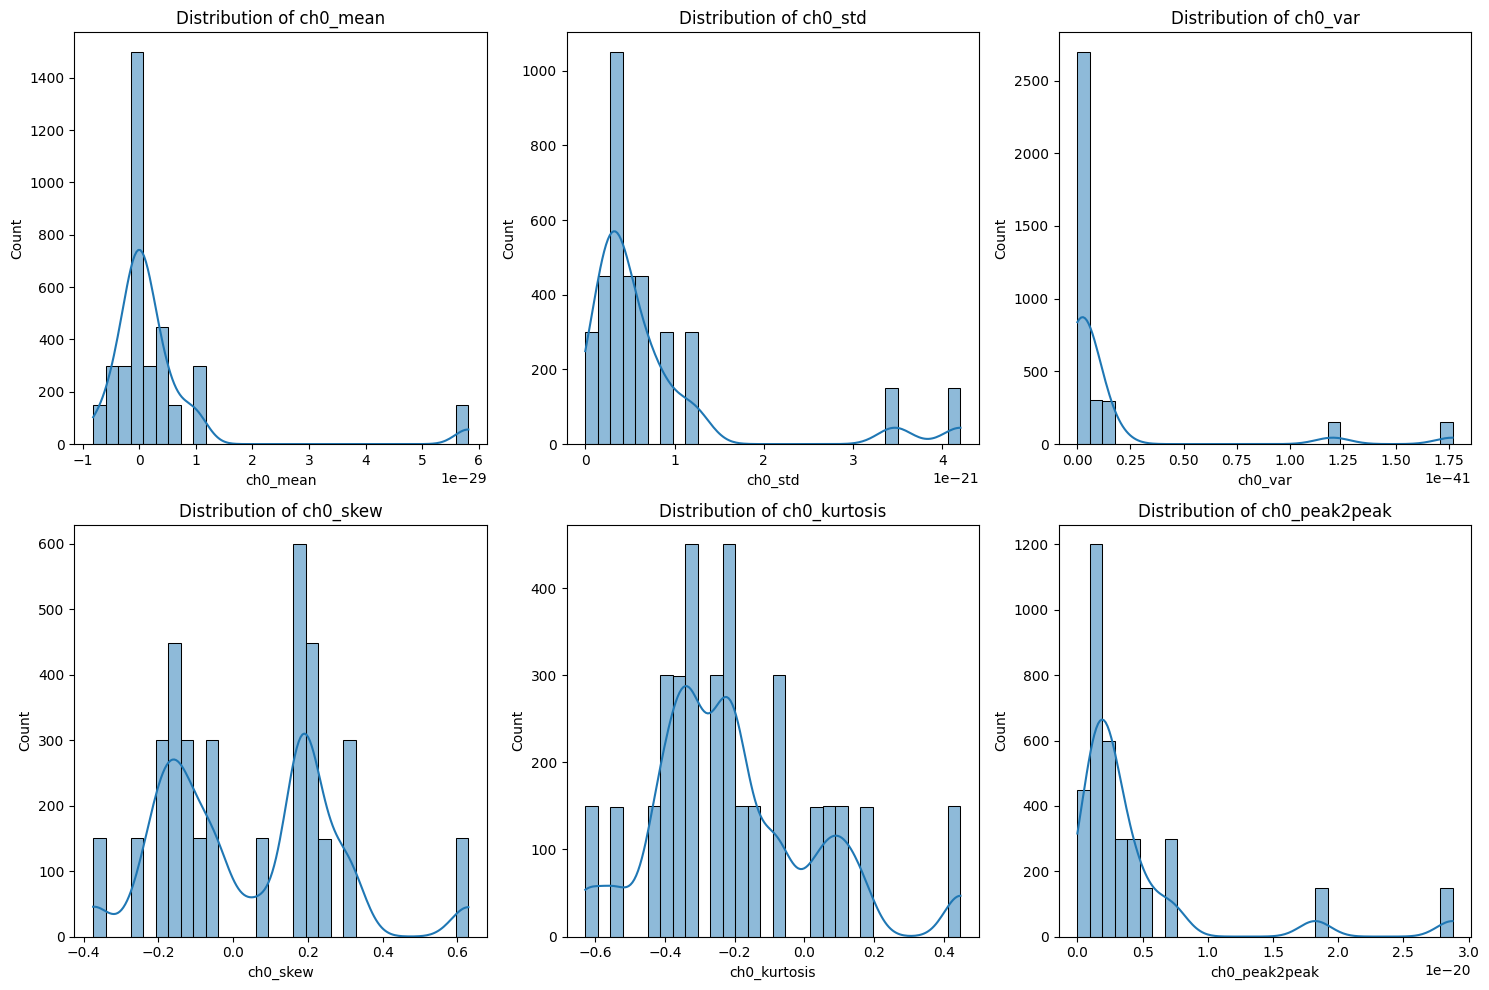

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns


selected_features = numeric_features_df.columns[:6]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(numeric_features_df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


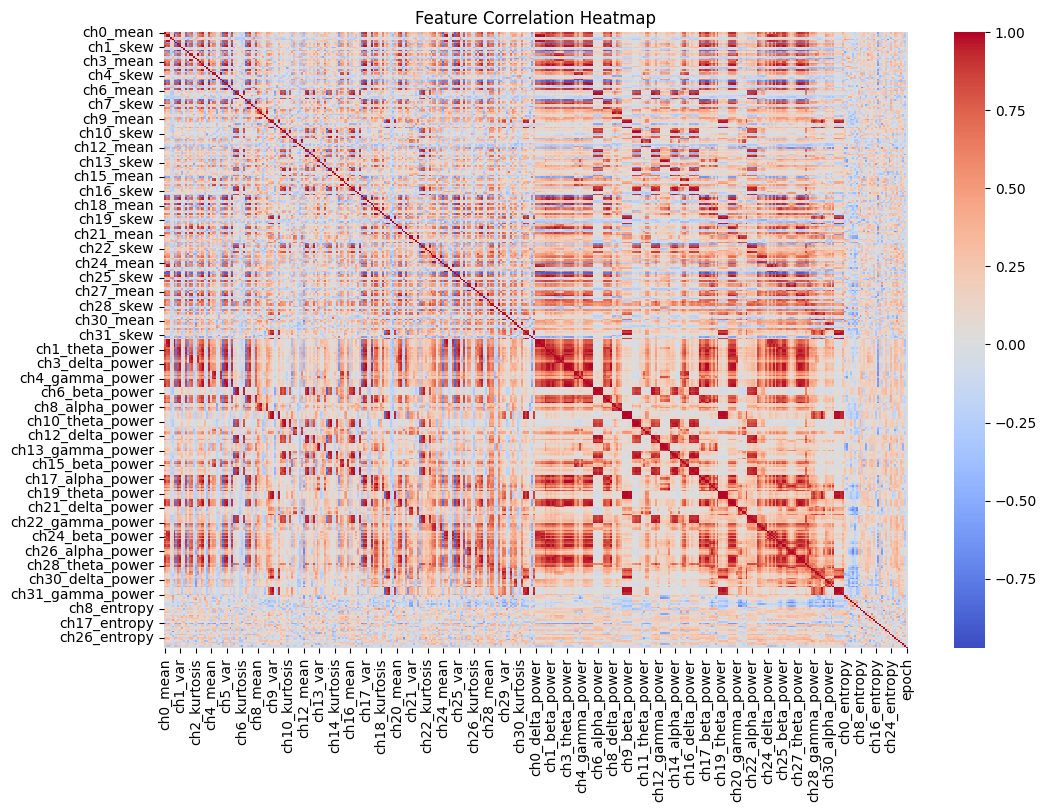

🔗 Highly correlated feature pairs (>|0.9|): [('ch0_mean', 'ch1_var'), ('ch0_mean', 'ch3_var'), ('ch0_mean', 'ch5_var'), ('ch0_mean', 'ch17_var'), ('ch0_mean', 'ch1_theta_power'), ('ch0_mean', 'ch1_alpha_power'), ('ch0_mean', 'ch1_gamma_power'), ('ch0_mean', 'ch3_delta_power'), ('ch0_mean', 'ch3_theta_power'), ('ch0_mean', 'ch3_alpha_power'), ('ch0_mean', 'ch3_beta_power'), ('ch0_mean', 'ch3_gamma_power'), ('ch0_mean', 'ch5_alpha_power'), ('ch0_mean', 'ch5_beta_power'), ('ch0_mean', 'ch5_gamma_power'), ('ch0_mean', 'ch7_gamma_power'), ('ch0_mean', 'ch17_delta_power'), ('ch0_mean', 'ch17_beta_power'), ('ch0_mean', 'ch17_gamma_power'), ('ch0_mean', 'ch20_delta_power'), ('ch0_mean', 'ch20_theta_power'), ('ch0_mean', 'ch20_alpha_power'), ('ch0_mean', 'ch20_beta_power'), ('ch0_mean', 'ch25_gamma_power'), ('ch0_mean', 'ch27_theta_power'), ('ch0_mean', 'ch27_alpha_power'), ('ch0_mean', 'ch27_beta_power'), ('ch0_std', 'ch0_var'), ('ch0_std', 'ch0_peak2peak'), ('ch0_std', 'ch24_std'), ('ch0_std'

In [125]:

correlation_matrix = numeric_features_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


high_correlation_pairs = []
correlation_threshold = 0.9

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
        if col1 != col2 and abs(correlation_matrix[col1][col2]) > correlation_threshold:
            high_correlation_pairs.append((col1, col2))

print(f"🔗 Highly correlated feature pairs (>|{correlation_threshold}|): {high_correlation_pairs}")


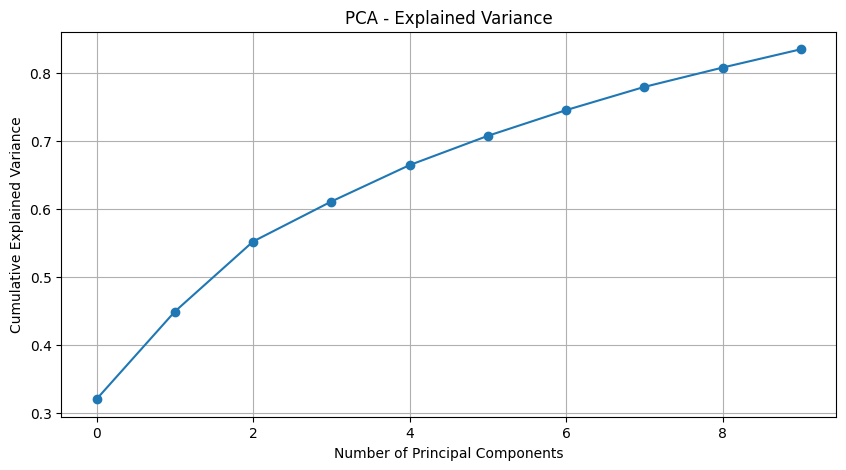

🔢 Explained variance ratio: [0.31973005 0.12897387 0.10320698 0.05890811 0.05363453]


In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features_df)


pca = PCA(n_components=10)
principal_components = pca.fit_transform(scaled_features)


plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid()
plt.show()


print("🔢 Explained variance ratio:", pca.explained_variance_ratio_[:5])


In [129]:
print("All Column Names:\n", df.columns.tolist())



non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNon-Numeric Columns (Possibly Word Column):", non_numeric_cols)

All Column Names:
 ['ch0_mean', 'ch0_std', 'ch0_var', 'ch0_skew', 'ch0_kurtosis', 'ch0_peak2peak', 'ch1_mean', 'ch1_std', 'ch1_var', 'ch1_skew', 'ch1_kurtosis', 'ch1_peak2peak', 'ch2_mean', 'ch2_std', 'ch2_var', 'ch2_skew', 'ch2_kurtosis', 'ch2_peak2peak', 'ch3_mean', 'ch3_std', 'ch3_var', 'ch3_skew', 'ch3_kurtosis', 'ch3_peak2peak', 'ch4_mean', 'ch4_std', 'ch4_var', 'ch4_skew', 'ch4_kurtosis', 'ch4_peak2peak', 'ch5_mean', 'ch5_std', 'ch5_var', 'ch5_skew', 'ch5_kurtosis', 'ch5_peak2peak', 'ch6_mean', 'ch6_std', 'ch6_var', 'ch6_skew', 'ch6_kurtosis', 'ch6_peak2peak', 'ch7_mean', 'ch7_std', 'ch7_var', 'ch7_skew', 'ch7_kurtosis', 'ch7_peak2peak', 'ch8_mean', 'ch8_std', 'ch8_var', 'ch8_skew', 'ch8_kurtosis', 'ch8_peak2peak', 'ch9_mean', 'ch9_std', 'ch9_var', 'ch9_skew', 'ch9_kurtosis', 'ch9_peak2peak', 'ch10_mean', 'ch10_std', 'ch10_var', 'ch10_skew', 'ch10_kurtosis', 'ch10_peak2peak', 'ch11_mean', 'ch11_std', 'ch11_var', 'ch11_skew', 'ch11_kurtosis', 'ch11_peak2peak', 'ch12_mean', 'ch12_s

In [130]:
df=pd.read_csv("/content/cleaned_features.csv")
df.shape

(3596, 387)